<a href="https://colab.research.google.com/github/Tanushri920/Hotel-booking-analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

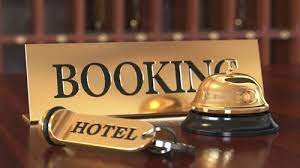

---



# Import Packages
 
   First import necessary packages

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline

# Mounting Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# csv file location

In [3]:
# csv file location
file_path = '/content/drive/MyDrive/CSV FILE/Hotel Bookings.csv'

# Reading Data

In [4]:
# read csv file 
df = pd.read_csv(file_path)

# Taking a look to data 

In [5]:
# checking first 5 rows
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
# cheking last 5 rows
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [7]:
# looking for the data types non null entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
# looking at the min, max values,mean values etc. NAN values for mean,25% ,50%,75%,max indicates those are categorical columns.
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [9]:
# creating copy of dataframe
df = df.copy()

# Overview of column

In [10]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

so before moving forward we will see the unique value attained by each column i.e removing duplicates if any have in the data.

   This will help us to get an proper data

In [11]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [12]:
df['is_canceled'].unique()

array([0, 1])

In [13]:
df['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [14]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [15]:
df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [16]:
df['children'].unique()             # This column contain 0 as well as nan value

array([ 0.,  1.,  2., 10.,  3., nan])

In [17]:
df['booking_changes'].unique()

array([ 3,  4,  0,  1,  2,  5, 17,  6,  8,  7, 10, 16,  9, 13, 12, 20, 14,
       15, 11, 21, 18])

In [18]:
df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

# Cleaning Data
  Cleaning data is an crucial step before EDA as it will remove the data which will not have an obvious meaning this will perform as it affect the outcome of the EDA.
      
  while cleaning data we will perform following steps: 1.Removing duplicate rows if any 2.Checking for null values 3.Converting column to appropriate data type 4.Adding important column if needed

Step 1 : Removing duplicate rows if any

In [19]:
# checking for duplicate rows
df[df.duplicated()].shape

(31994, 32)

In [20]:
# droping duplicate value
df.drop_duplicates(inplace = True)

In [21]:
df.shape

(87396, 32)

Step 2 : Checking for Null values

In [22]:
# checking for Null value
df.isnull().sum().sort_values(ascending = False)[:6]

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
assigned_room_type        0
dtype: int64

So we Have Null values in columns- Company, agent, Country,children.

 1) for company and agent I will fill the Missing values with 0

 2) for country I will fill Missing values with oject 'Others'. ( assuming while collecting data country was not found so user selected the 'Others' option.)

 3) AS the count of missing values in Children Column is only 4, so we can replace with 0 considering no childrens.

In [23]:
# replacing Null value with 0
null_columns=['agent','children','company']
for col in null_columns:
  df[col].fillna(0,inplace=True)


# Replacing NA values with 'others'
df['country'].fillna('others',inplace=True)

In [24]:
# Checking if all null values are removed
df.isnull().sum().sort_values(ascending = False)[:6]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
dtype: int64

Their are some rows like adults, children or babys equal to zero so we will remove them

In [25]:
df[df['adults']+df['babies']+df['children'] == 0].shape

(166, 32)

In [26]:
df.drop(df[df['adults']+df['babies']+df['children'] == 0].index, inplace = True)

Step 3 : Converting column to appropriate datatype

In [27]:
# Converting datatype of columns 'children', 'company' and 'agent' from float to int.
df[['children', 'company', 'agent']] = df[['children', 'company', 'agent']].astype('int64')

In [28]:
# changing datatype of column 'reservation_status_date' to data_type.
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format = '%Y-%m-%d')

Step 4 : Adding important column

In [29]:
# Adding total staying days in hotels
df['total_stay'] = df['stays_in_weekend_nights']+df['stays_in_week_nights']


In [30]:
# Adding total people num as column, i.e. total people num = num of adults + children + babies
df['total_people'] = df['adults']+df['children']+df['babies']

So finally after doing an lots of efforts with data we get an clear data

Now lets move towards the main part of our project i.e EDA


 # ***EDA ( Expolartory Data Analysis )***
 Now let's do the fun part extract the information from our data and try to answer our questions

# **Univatiate Analysis**
 Univariate analysis is the analysis of an one variable

##Which agent make the highest bookings ?

In [31]:
# return highest bookings made by agents
highest_bookings= df.groupby(['agent'])['agent'].agg({'count'}).reset_index().rename(columns={'count': "Most_Bookings" }).sort_values(by='Most_Bookings',ascending=False)

 # as agent 0 was NAN value and we replaced it with 0 and indicates no bookings.so droping.
highest_bookings.drop(highest_bookings[highest_bookings['agent']==0].index,inplace=True) 

# taking top 10 bookings made by agent
top_ten_highest_bookings=highest_bookings[:10]

top_ten_highest_bookings

,agent,Most_Bookings
9,9,28721
174,240,13028
14,14,3342
7,7,3294
183,250,2779
175,241,1644
27,28,1493
8,8,1383
1,1,1228
6,6,1117


Text(0.5, 1.0, 'Most Bookings Made by the agent')

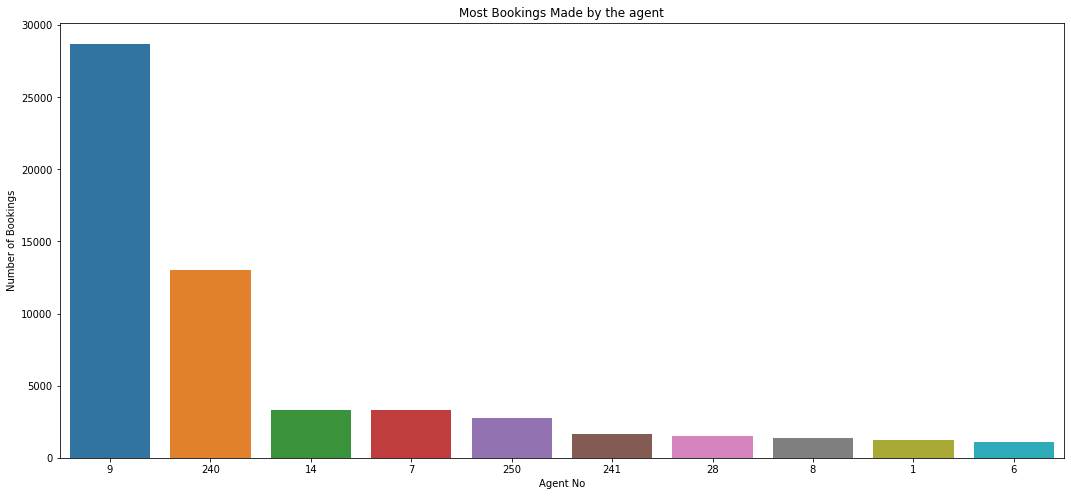

In [32]:
#Visualizaing the graph

plt.figure(figsize=(18,8))
sns.barplot(x=top_ten_highest_bookings['agent'],y=top_ten_highest_bookings['Most_Bookings'],order=top_ten_highest_bookings['agent'])
plt.xlabel('Agent No')
plt.ylabel('Number of Bookings')
plt.title("Most Bookings Made by the agent")

So the agent id number 9 made most bookings.

# Which is the most preferred room type by the customers?


Text(0.5, 1.0, 'Most preferred Room type')

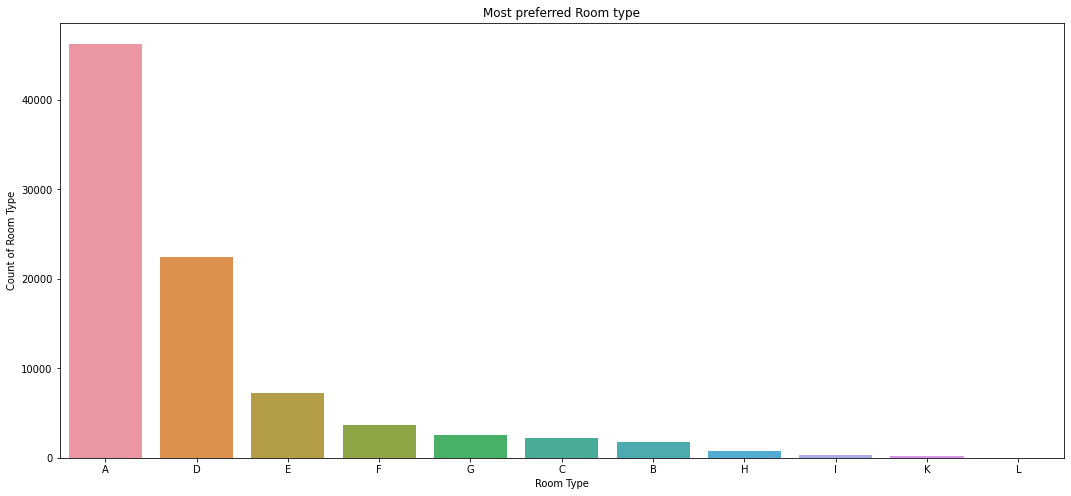

In [32]:
plt.figure(figsize=(18,8))

sns.countplot(x=df['assigned_room_type'],order=df['assigned_room_type'].value_counts().index)

plt.xlabel('Room Type')

plt.ylabel('Count of Room Type')

plt.title("Most preferred Room type")

Observation : 
So the most preferred Room type is "A".

# Types of food mostly preferred by the guests

Text(0.5, 1.0, 'Preferred Meal Type')

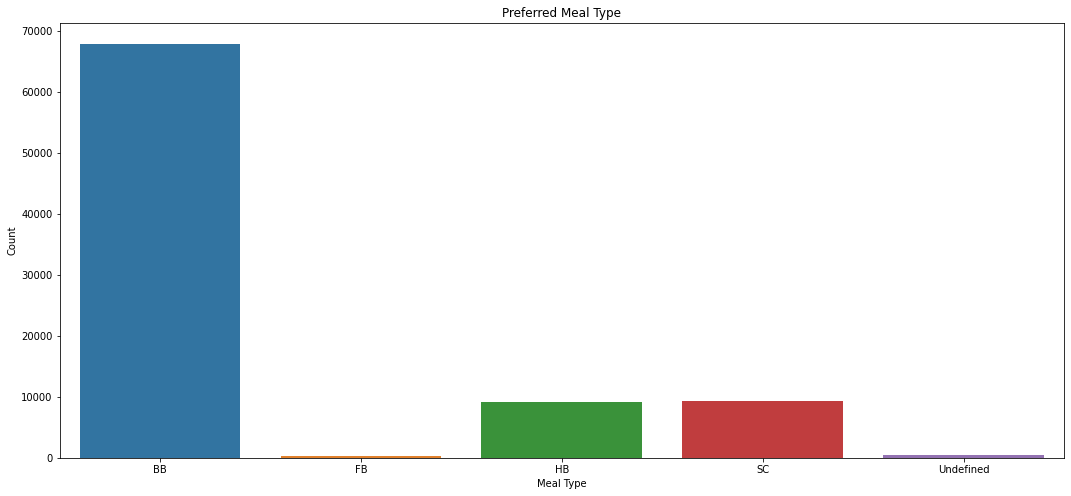

In [33]:
# df['meal'].value_counts().plot.pie(explode=[0.05, 0.05,0.05,0.05,0.05], autopct='%1.1f%%', shadow=True, figsize=(20,15),fontsize=20)
plt.figure(figsize=(18,8))
sns.countplot(x=df['meal'])
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.title("Preferred Meal Type")

Types of meal in hotels:

BB - (Bed and Breakfast)

HB- (Half Board)

FB- (Full Board)

SC- (Self Catering)

Observation :
 So the most preferred meal type by the guests is BB( Bed and Breakfast). HB- (Half Board) and SC- (Self Catering) are equally preferred.

## From which country the most guests are coming ?

In [34]:
country_wise_guests = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

,country,No of guests
0,PRT,17573
1,GBR,8440
2,FRA,7091
3,ESP,5382
4,DEU,4332
...,...,...
161,ZMB,1
162,SYC,1
163,MDG,1
164,SMR,1


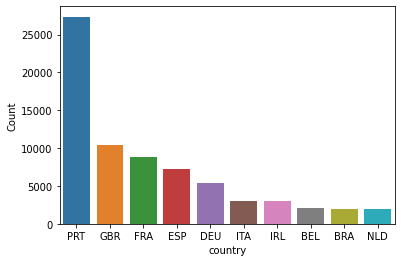

In [35]:
grouped_by_country = df.groupby('country')
d1 = pd.DataFrame(grouped_by_country.size()).reset_index().rename(columns = {0:'Count'}).sort_values('Count', ascending = False)[:10]
sns.barplot(x = d1['country'], y  = d1['Count'])
plt.show()

Observation : Most guests are coming from portugal and other europian country.

# **Hotel wise Analysis**

## Most preferred hotel by guests

Text(0.5, 1.0, 'Pie Chart for Most Preffered  Hotel')

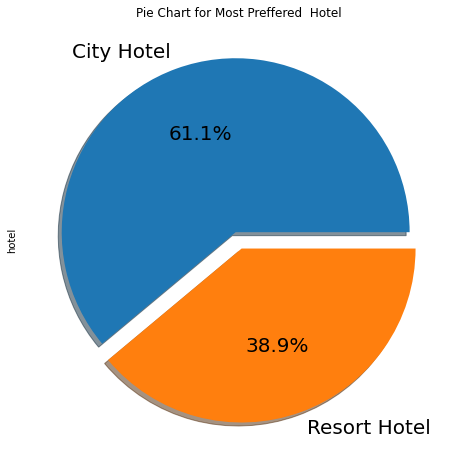

In [36]:
# Visualizsing by the pie chart.
df['hotel'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)   
plt.title('Pie Chart for Most Preffered  Hotel')

Observation : Most preferred Hotel by the guests is city hotel. Thus city hotel has maximum number of bookings.

# Which Hotel type has more lead time

In [37]:
# group by hotel
group_by_hotel=df.groupby('hotel')

Text(0.5, 1.0, 'Average Lead Time for each Hotel type')

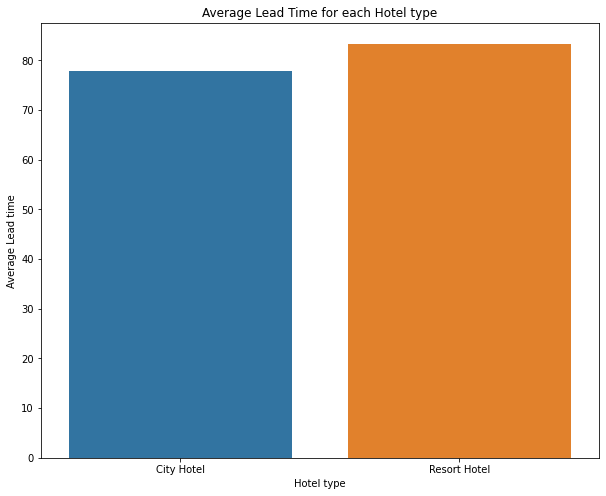

In [38]:
#group by hotel and taking mean of lead time
avg_lead_time=group_by_hotel['lead_time'].mean().reset_index()

#set plot size
plt.figure(figsize=(10,8))

# plot the bar plot
sns.barplot(x=avg_lead_time['hotel'],y=avg_lead_time['lead_time'])
# set lables
plt.xlabel('Hotel type')
plt.ylabel('Average Lead time')
plt.title("Average Lead Time for each Hotel type")

Observation : Resort hotel has highest lead time than city hotel

# What is the Optimal stay length in both types of hotels ?


In [39]:
stay = df.groupby(['total_stay', 'hotel']).agg('count').reset_index()   # group by total stay and hotel
stay = stay.iloc[:, :3]                                                   # take 1st 3 columns
stay = stay.rename(columns={'is_canceled':'Number of stays'})    # rename the columns

Text(0.5, 0, 'total_stay(days)')

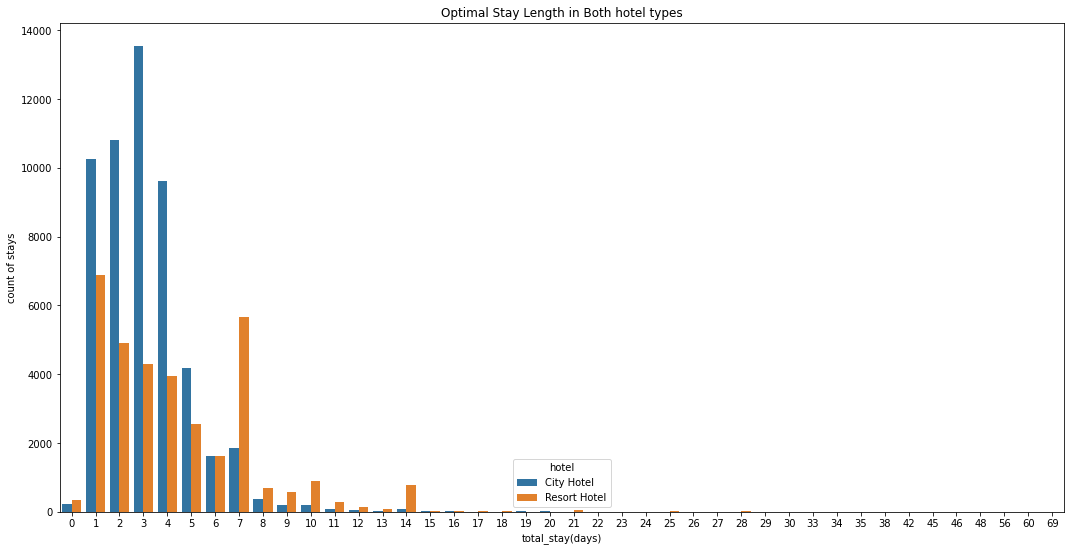

In [40]:
# set plot size and plot barchart
plt.figure(figsize=(18,9))
sns.barplot(x='total_stay',y='Number of stays',hue='hotel',data=stay)

#set labels
plt.title('Optimal Stay Length in Both hotel types')
plt.ylabel('count of stays')
plt.xlabel('total_stay(days)')

Observation :
Optimal stay in both the type hotel is less than 7 days.

# Which Hotel has longer waiting time

Text(0.5, 1.0, 'Waiting time for each hotel type')

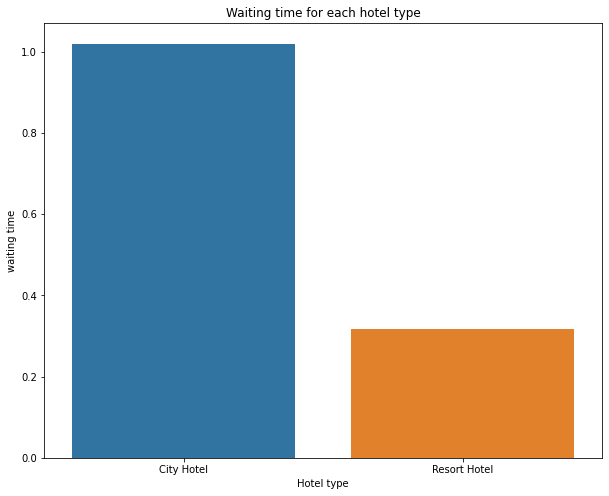

In [41]:
#groupping by hoetl and takin mean of days in waiting list
waiting_time_df=df.groupby('hotel')['days_in_waiting_list'].mean().reset_index()

#set the plot size
plt.figure(figsize=(10,8))

# plot barchart
sns.barplot(x=waiting_time_df['hotel'],y=waiting_time_df['days_in_waiting_list'])

#set labels
plt.xlabel('Hotel type')
plt.ylabel('waiting time')
plt.title("Waiting time for each hotel type")

Observation : So the City Hotels has longer waiting period than the Resort Hotels. Thus we can say that City Hotels are much busier than the Resort Hotels

# Percentage of repeated guests

Text(0.5, 1.0, ' Percentgae of repeated guests')

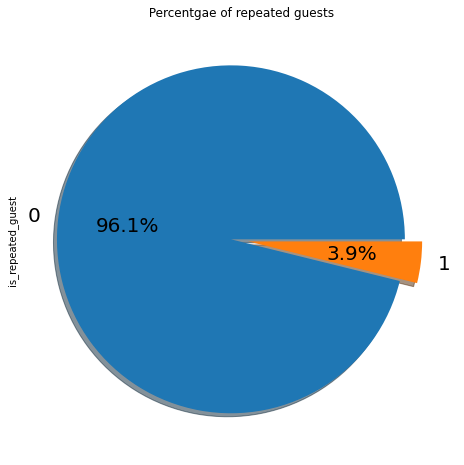

In [42]:
df['is_repeated_guest'].value_counts().plot.pie(explode=(0.05,0.05),autopct='%1.1f%%',shadow=True,figsize=(12,8),fontsize=20)

plt.title(" Percentgae of repeated guests")

Observation : very few i.e only 3.9% guests are repeated

# Percentage of booking changes made by the customer

Text(0, 0.5, 'Percentage(%)')

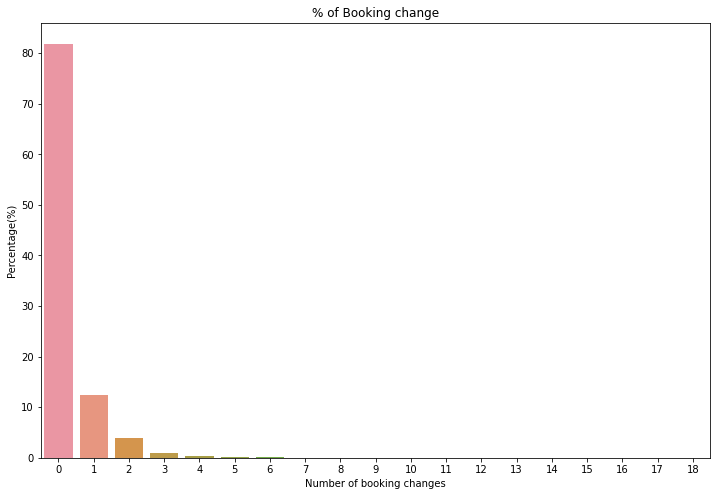

In [43]:
booking_changes_df=df['booking_changes'].value_counts().reset_index().rename(columns={'index': "number_booking_changes",'booking_changes':'Counts'})

plt.figure(figsize=(12,8))
sns.barplot(x=booking_changes_df['number_booking_changes'],y=booking_changes_df['Counts']*100/df.shape[0])
plt.title("% of Booking change")
plt.xlabel('Number of booking changes')
plt.ylabel('Percentage(%)')

0= 0 changes made in the booking

1= 1 changes made in the booking

2= 2 changes made in the booking

Observation :
Almost 82% of the bookings were not changed by guests.


# **Distribution channel wise Analysis**

## Which Distribution channel is mostly used for hotel bookings?

Text(0.5, 1.0, ' Mostly Used Distribution Channel for Hotel Bookings ')

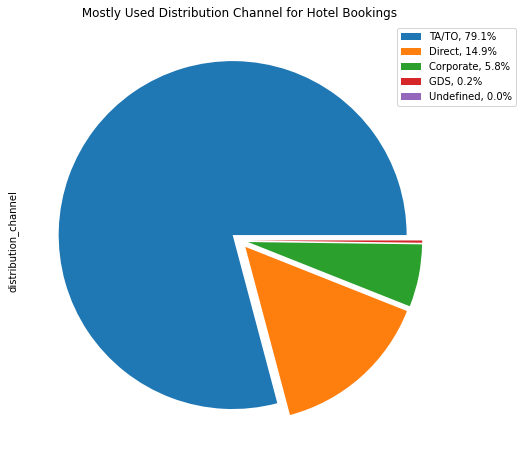

In [44]:
# Visualizsing by the pie chart.


#Creating labels
labels=df['distribution_channel'].value_counts().index.tolist()

# creating new df of distribution channel
distribution_channel_df=df['distribution_channel'].value_counts().reset_index().rename(columns={'index':"distribution_channel",'distribution_channel':'count'})

#adding percentage columns to the distribution_channel_df
distribution_channel_df['percentage']=round(distribution_channel_df['count']*100/df.shape[0],1)

#Creating list of percentage
sizes=distribution_channel_df['percentage'].values.tolist()

#plotting the pie chart
df['distribution_channel'].value_counts().plot.pie(explode=[0.05, 0.05,0.05,0.05,0.05], shadow=False, figsize=(15,8),fontsize=10,labels=None)   

# setting legends with the percentage values
labels = [f'{l}, {s}%' for l, s in zip(labels, sizes)]
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)
plt.title(' Mostly Used Distribution Channel for Hotel Bookings ')

Observtion : 'TA/TO' is mostly(79.1%) used for booking hoetls.

# **Booking cancellation Analysis**

## Percentage of cancellation

Text(0.5, 1.0, 'Cancellation and non Cancellation')

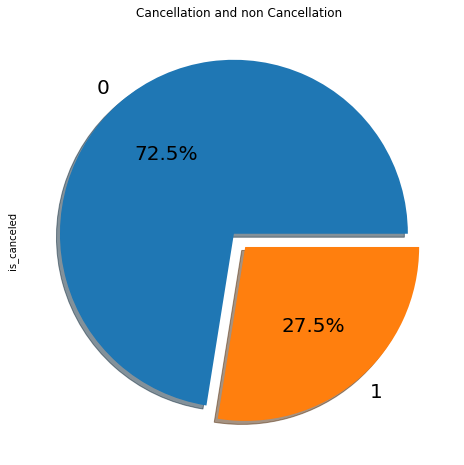

In [45]:
# pie chart for percentage of cancellation 
df['is_canceled'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)
plt.title("Cancellation and non Cancellation")

Observation :

0= not cancled

1= canceled

27.5 % of the bookings were cancelled.

# Which Market Segment has the highest cancellation rate?

In [46]:
market_segment_df=df[df['is_canceled']==1]   # canceled=1
market_segment_df
market_segment_df=market_segment_df.groupby(['market_segment','hotel']).size().reset_index().rename(columns={0:'counts'})   # group by

market_segment_df

,market_segment,hotel,counts
0,Aviation,City Hotel,45
1,Complementary,City Hotel,54
2,Complementary,Resort Hotel,31
3,Corporate,City Hotel,263
4,Corporate,Resort Hotel,246
5,Direct,City Hotel,912
6,Direct,Resort Hotel,825
7,Groups,City Hotel,887
8,Groups,Resort Hotel,445
9,Offline TA/TO,City Hotel,1257


Text(0.5, 1.0, 'Cancellation Rate Vs market_segment')

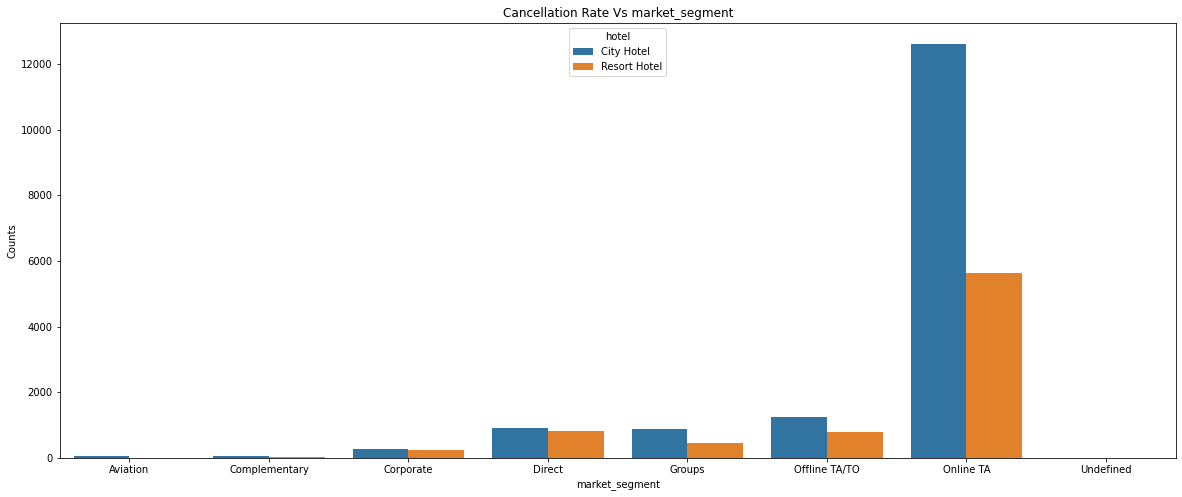

In [47]:
#set plotsizde and plot barchart
plt.figure(figsize=(20,8))
sns.barplot(x='market_segment',y='counts',hue="hotel",data= market_segment_df)

# set labels
plt.xlabel('market_segment')
plt.ylabel('Counts')
plt.title('Cancellation Rate Vs market_segment')

Observation : 
'Online T/A' has the highest cancellation rate.

# **Time wise Analysis**

## Busiest month for the Hotel

Text(0, 0.5, 'Number of bookings')

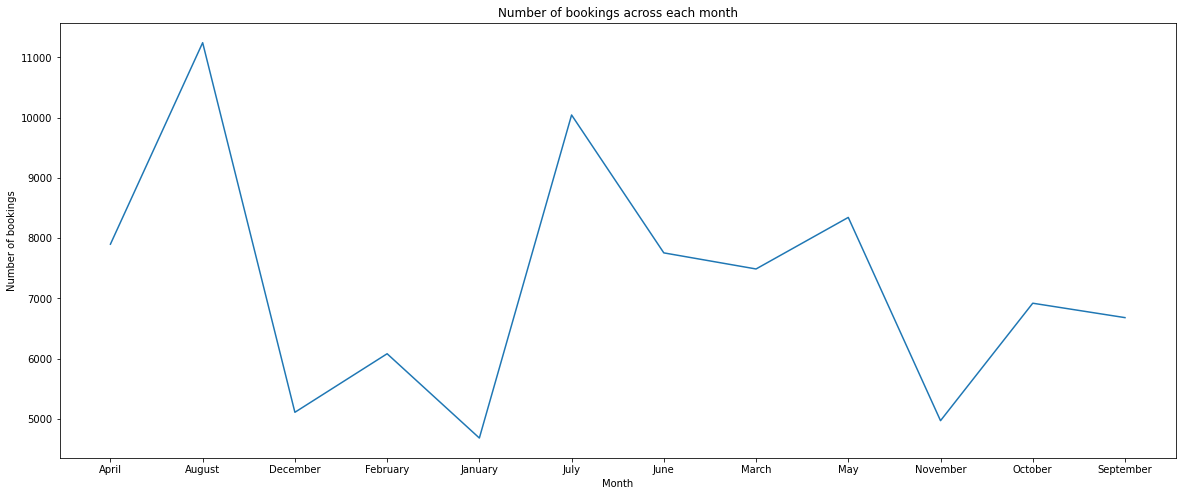

In [48]:
bookings_by_months_df=df.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel':"Counts"})
# set plot size
plt.figure(figsize=(20,8))

#pltting lineplot on x- months & y- booking counts
sns.lineplot(x=bookings_by_months_df['arrival_date_month'],y=bookings_by_months_df['Counts'])

plt.title('Number of bookings across each month')
plt.xlabel('Month')
plt.ylabel('Number of bookings')

August and july has maximum number of bookings, thus august and july is the busiest month.

#**Correlation**

Text(0.5, 1.0, 'cor-relation of columns')

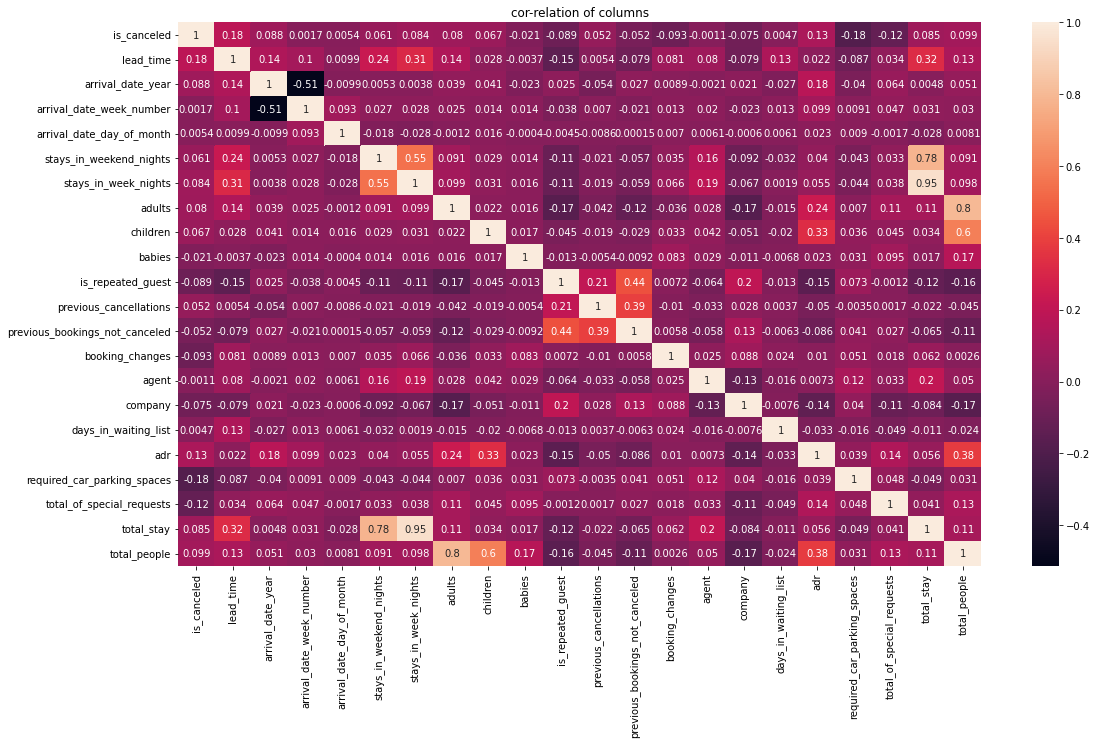

In [49]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot = True)
plt.title('cor-relation of columns')

◼ is_canceled and same_room_alloted_or_not are negatively corelated. That means customer is unlikely to cancel his bookings if he don't get the same room as per reserved room. 

◼ lead_time and total_stay is positively corelated.That means more is the stay of cutsomer more will be the lead time.

◼ adults,childrens and babies are corelated to each other. That means more the people more will be adr.

◼ is_repeated guest and previous bookings not canceled has strong corelation. may be repeated guests are not more likely to cancel their bookings.

# ADR relationship with total number of people

In [50]:
df.drop(df[df['adr'] > 5000].index, inplace = True)

Text(0.5, 1.0, 'ADR v/s Total Number of people')

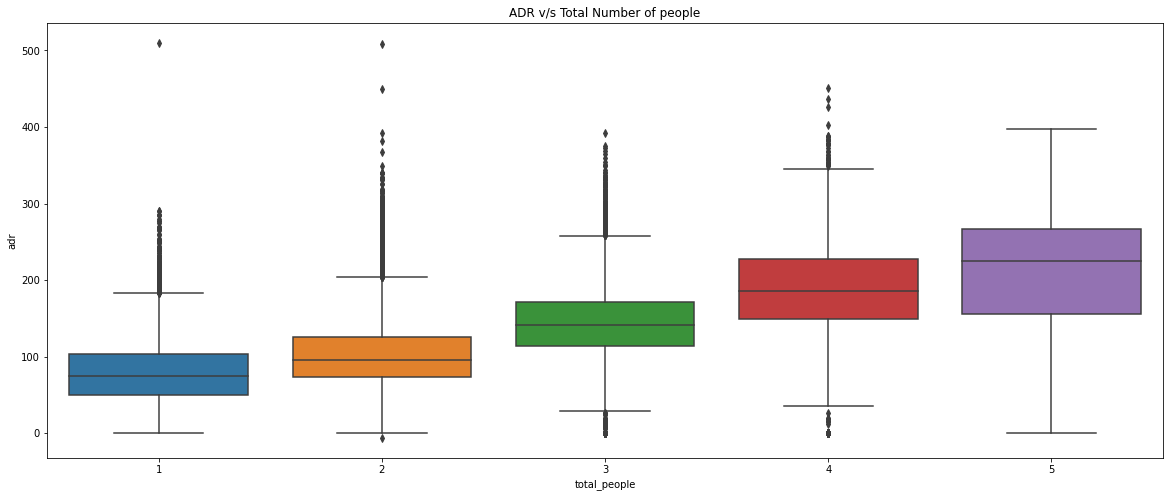

In [51]:
plt.figure(figsize=(20,8))
df2=df[df['total_people'] < 6]

sns.boxplot(x=df2['total_people'],y=df2['adr'])

# set lables
plt.title('ADR v/s Total Number of people')

As the total number of people increases adr also increases.

Thus adr and total people are directly proportional to each other.

# **Conclusion**

♦ City hotel are most preffered by the guests thus the city hotel has maximum number of bookings so we can say that city hotel is the busiest hotel.

♦ Optimal stay length in both the type of hotel is less than 7 days.

♦ Most guests are coming from european countrt,i.e most number of guests from portugal.

♦ BB(Bed & Breakfast) is the most preferred meal by the guests.

♦ Agent Id no.9 made most booking.

♦ Average lead time for resort hotel is high.

♦ Very few i.e (3.9%) guest are repeated .

♦ Almost 82% of the booking where not change by guests.

♦ Most preferred room type by the guests is 'A'.

♦ City hotel has longer waiting period than the resort hotel,thus we can say that city hotel are much busies than the resort hotel.

♦ Ta/To is mostly (79.1%) used for booking hotels.

♦ 27.5% Of the booking where got cancelled from all the bookings.

♦ 'Online T/A' has the highest cancellation in both type of cities.

♦ July-August are the most busier and profitable months for the hotel.
